In [60]:
pwd

'/Users/james/JWSTdata/GJ341b/MAST_2023-03-12T0537/JWST/reduction01/reduction_notebooks'

After running [assignwcs](https://jwst-pipeline.readthedocs.io/en/latest/jwst/assign_wcs/main.html) and [extract2d](https://jwst-pipeline.readthedocs.io/en/latest/jwst/extract_2d/main.html#overview) of the jwst pipeline.

In [30]:
%matplotlib nbagg

In [31]:
from astropy.io import fits
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

In [32]:
assignwcs = fits.open("../../jw01981031001_04103_00001-seg001_nrcalong/jw01981031001_04103_00001-seg001_nrcalong_1_assignwcsstep.fits")

In [33]:
assignwcs.info()

Filename: ../../jw01981031001_04103_00001-seg001_nrcalong/jw01981031001_04103_00001-seg001_nrcalong_1_assignwcsstep.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     306   ()      
  1  SCI           1 ImageHDU        65   (2048, 128, 380)   float32   
  2  ERR           1 ImageHDU        11   (2048, 128, 380)   float32   
  3  DQ            1 ImageHDU        12   (2048, 128, 380)   int32 (rescales to uint32)   
  4  INT_TIMES     1 BinTableHDU     24   380R x 7C   [J, D, D, D, D, D, D]   
  5  VAR_POISSON    1 ImageHDU        10   (2048, 128, 380)   float32   
  6  VAR_RNOISE    1 ImageHDU        10   (2048, 128, 380)   float32   
  7  ASDF          1 BinTableHDU     11   1R x 1C   [37880B]   


In [46]:
extract2d = fits.open("../../jw01981031001_04103_00001-seg001_nrcalong/jw01981031001_04103_00001-seg001_nrcalong_1_extract2dstep.fits")
wvl_array = extract2d["WAVELENGTH"].data

In [47]:
extract2d.info()

Filename: ../../jw01981031001_04103_00001-seg001_nrcalong/jw01981031001_04103_00001-seg001_nrcalong_1_extract2dstep.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     307   ()      
  1  SCI           1 ImageHDU        76   (2048, 128, 380)   float32   
  2  ERR           1 ImageHDU        11   (2048, 128, 380)   float32   
  3  DQ            1 ImageHDU        12   (2048, 128, 380)   int32 (rescales to uint32)   
  4  WAVELENGTH    1 ImageHDU         9   (2048, 128)   float32   
  5  VAR_POISSON    1 ImageHDU        10   (2048, 128, 380)   float32   
  6  VAR_RNOISE    1 ImageHDU        10   (2048, 128, 380)   float32   
  7  VAR_FLAT      1 ImageHDU        10   (2048, 128, 380)   float32   
  8  INT_TIMES     1 BinTableHDU     24   380R x 7C   [J, D, D, D, D, D, D]   
  9  ASDF          1 BinTableHDU     11   1R x 1C   [40137B]   


In [48]:
xpos = pickle.load(open("../pickled_objects/x_positions_1.pickle","rb"))
xpos_mean = xpos.mean(axis=0)

In [49]:
less ../extraction_input.txt

In [50]:
row_min = 770
row_max = 2000
oversampling_factor = 10

xpos /= oversampling_factor
xpos_mean /= oversampling_factor

In [51]:
np.nanmin(wvl_array),np.nanmax(wvl_array)

(3.0756063, 5.130824)

In [52]:
wvl_array.shape

(128, 2048)

<IPython.core.display.Javascript object>


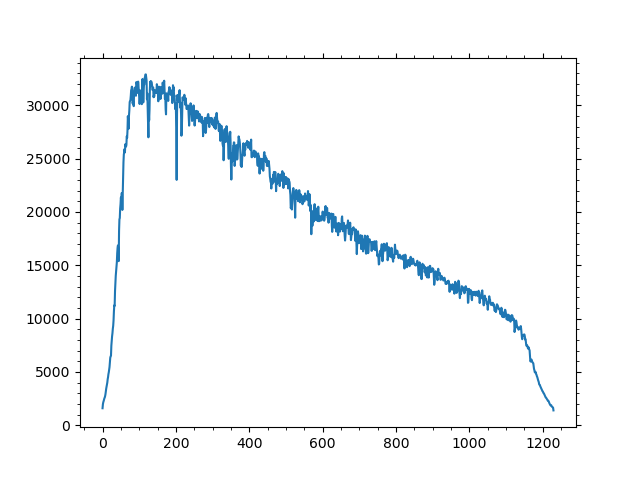

In [53]:
s1 = pickle.load(open("../pickled_objects/star1_flux_resampled.pickle","rb"))

plt.figure()
plt.plot(s1.mean(axis=0))
plt.show()

OK, this time I'm going to rotate the wavelength array so that it has same orientation as xpos

In [54]:
rotated_wvl_array = np.flip(wvl_array.T,axis=1)

<IPython.core.display.Javascript object>


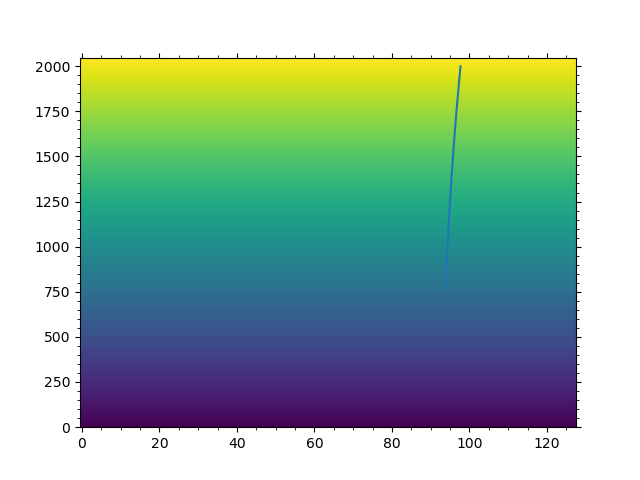

In [55]:
plt.figure()
plt.imshow(rotated_wvl_array,aspect="auto")
plt.plot(xpos_mean,np.arange(row_min,row_max))
plt.show()

In [56]:
for row in rotated_wvl_array:
    print(np.all(row == row.mean()))

False
True
False
False
False
False
True
False
False
False
False
False
True
False
False
False
False
True
False
False
False
False
True
False
False
False
False
True
False
False
False
False
True
False
False
False
False
True
False
False
False
False
True
False
False
False
False
True
False
False
False
False
True
False
False
False
False
True
False
False
False
False
True
False
False
False
False
False
True
False
False
False
False
True
False
False
False
False
True
False
False
False
False
True
False
False
False
False
True
False
False
False
False
True
False
False
False
False
True
False
False
False
False
True
False
False
False
False
True
False
False
False
False
True
False
False
False
False
True
False
False
False
False
False
True
False
False
False
False
True
False
False
False
False
True
False
False
False
False
True
False
False
False
False
True
False
False
False
False
True
False
False
False
False
True
False
False
False
False
True
False
False
False
False
True
False
False
False
False
True
False
False
Fa

In [57]:
wvl_solution = []

for i,row in enumerate(np.arange(row_min,row_max)):
    x = np.round(xpos_mean[i]).astype(int)
    w = rotated_wvl_array[row][x]
    wvl_solution.append(w)
    
wvl_solution = np.array(wvl_solution)

<IPython.core.display.Javascript object>


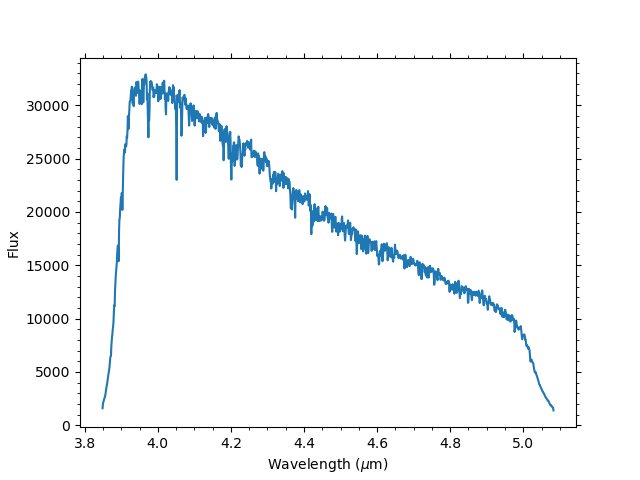

In [58]:
plt.figure()
plt.plot(wvl_solution,s1.mean(axis=0))
plt.xlabel("Wavelength ($\mu$m)")
plt.ylabel("Flux")
plt.show()

In [59]:
pickle.dump(wvl_solution,open("../pickled_objects/wvl_solution.pickle","wb"))